<a href="https://colab.research.google.com/github/thesimaranjaira/AspectExtraction_SentimentAnalysis/blob/main/corrected_windelta_actual_winter_scatter_NO1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install energyquantified

     |████████████████████████████████| 76 kB 2.3 MB/s 
     |████████████████████████████████| 227 kB 33.2 MB/s 
     |████████████████████████████████| 61 kB 2.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.2
    Uninstalling python-dateutil-2.8.2:
      Successfully uninstalled python-dateutil-2.8.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.25.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import pandas as pd
from datetime import timedelta, date
from energyquantified import EnergyQuantified
from energyquantified.time import Frequency
from energyquantified.metadata import Aggregation
from datetime import datetime as dtdatetime
from energyquantified.time import (
   Resolution, Frequency, UTC, get_datetime
)
import matplotlib as mplt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
api_key = 'ea1244-4926fe-571bed-d0f4b5'
EQ = EnergyQuantified(api_key=api_key)

In [6]:
def get_data_from_instance(identifier, issued, frequency):
    forecast = EQ.instances.get(
        identifier,
        issued=issued,
        tag='arome',                        # select forecast
        frequency=frequency,
        aggregation=Aggregation.AVERAGE,
        # ensembles=True                    # Include ensembles
    )
    df = forecast.to_dataframe()
   
    return df

In [7]:
from datetime import datetime, time

In [8]:
day_ahead_zero = EQ.timeseries.load(
   'NO1 Wind Power Production MWh/h H Actual',
   begin='2020-11-01',
   end='2021-02-27',
   frequency=Frequency.PT1H
)
day_ahead_zero = day_ahead_zero.to_dataframe()

In [9]:
day_ahead_zero

,NO1 Wind Power Production MWh/h H Actual
,
,
date,
2020-11-01 00:00:00+01:00,151
2020-11-01 01:00:00+01:00,154
2020-11-01 02:00:00+01:00,152
2020-11-01 03:00:00+01:00,153
2020-11-01 04:00:00+01:00,154
...,...
2021-02-26 19:00:00+01:00,142


In [10]:
day_ahead_forecast_twelve = EQ.instances.relative(
   'NO1 Wind Power Production MWh/h 15min Forecast',
   begin=dtdatetime(2020, 11, 1, 0, 0, 0),
   end=dtdatetime(2021, 2, 27, 0, 0, 0),
   tag='arome',
   days_ahead = 1,  # The day-ahead forecast (0 or higher allowed)
   time_of_day = time(12, 0),  # Issued at exactly 12:00
  #  issued ='earliest',
   frequency = Frequency.PT1H
)
day_ahead_twelve=day_ahead_forecast_twelve.to_dataframe()

In [11]:
day_ahead_twelve

,NO1 Wind Power Production MWh/h 15min Forecast
,
,
date,
2020-11-01 00:00:00+01:00,104.90
2020-11-01 01:00:00+01:00,147.00
2020-11-01 02:00:00+01:00,150.68
2020-11-01 03:00:00+01:00,153.10
2020-11-01 04:00:00+01:00,159.70
...,...
2021-02-26 19:00:00+01:00,146.80


In [12]:
df_comb = pd.merge(day_ahead_zero, day_ahead_twelve, left_index=True, right_index=True, how='inner')
df_comb

,NO1 Wind Power Production MWh/h H Actual,NO1 Wind Power Production MWh/h 15min Forecast
,,
,,
date,,
2020-11-01 00:00:00+01:00,151,104.90
2020-11-01 01:00:00+01:00,154,147.00
2020-11-01 02:00:00+01:00,152,150.68
2020-11-01 03:00:00+01:00,153,153.10
2020-11-01 04:00:00+01:00,154,159.70
...,...,...
2021-02-26 19:00:00+01:00,142,146.80


In [13]:
df_comb.columns

MultiIndex([(      'NO1 Wind Power Production MWh/h H Actual', '', ''),
            ('NO1 Wind Power Production MWh/h 15min Forecast', '', '')],
           )

In [14]:
df_comb['Wind Delta', '', '']= df_comb['NO1 Wind Power Production MWh/h H Actual',''] - df_comb['NO1 Wind Power Production MWh/h 15min Forecast','']

/usr/local/lib/python3.7/dist-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


In [15]:
df_comb

,NO1 Wind Power Production MWh/h H Actual,NO1 Wind Power Production MWh/h 15min Forecast,Wind Delta
,,,
,,,
date,,,
2020-11-01 00:00:00+01:00,151,104.90,46.10
2020-11-01 01:00:00+01:00,154,147.00,7.00
2020-11-01 02:00:00+01:00,152,150.68,1.32
2020-11-01 03:00:00+01:00,153,153.10,-0.10
2020-11-01 04:00:00+01:00,154,159.70,-5.70
...,...,...,...
2021-02-26 19:00:00+01:00,142,146.80,-4.80


In [16]:
df_comb.columns

MultiIndex([(      'NO1 Wind Power Production MWh/h H Actual', '', ''),
            ('NO1 Wind Power Production MWh/h 15min Forecast', '', ''),
            (                                    'Wind Delta', '', '')],
           )

In [17]:
df_comb.drop(['NO1 Wind Power Production MWh/h H Actual', 'NO1 Wind Power Production MWh/h 15min Forecast'], axis=1, level=0 ,inplace=True)
df_comb

,Wind Delta
,
,
date,
2020-11-01 00:00:00+01:00,46.10
2020-11-01 01:00:00+01:00,7.00
2020-11-01 02:00:00+01:00,1.32
2020-11-01 03:00:00+01:00,-0.10
2020-11-01 04:00:00+01:00,-5.70
...,...
2021-02-26 19:00:00+01:00,-4.80


In [18]:
df_comb.columns = ['_'.join(col) for col in df_comb.columns.values]

In [19]:
df_comb

,Wind Delta__
date,
2020-11-01 00:00:00+01:00,46.10
2020-11-01 01:00:00+01:00,7.00
2020-11-01 02:00:00+01:00,1.32
2020-11-01 03:00:00+01:00,-0.10
2020-11-01 04:00:00+01:00,-5.70
...,...
2021-02-26 19:00:00+01:00,-4.80
2021-02-26 20:00:00+01:00,-22.05
2021-02-26 21:00:00+01:00,-53.00


In [20]:
df_comb.columns

Index(['Wind Delta__'], dtype='object')

In [21]:
spot=(pd.read_csv('/content/drive/My Drive/dataset/market_prices_euro_updated.csv', index_col = ["time"], parse_dates=True).loc[:,"NO1_spot"])
imbalance = (pd.read_csv('/content/drive/My Drive/dataset/market_prices_euro_updated.csv', index_col = ["time"], parse_dates=True).loc[:,"NO1_imbalance"])

In [22]:
spot=spot.to_frame()
imbalance= imbalance.to_frame()

In [23]:
spot

,NO1_spot
time,
2018-02-01 00:00:00,0.02552
2018-02-01 01:00:00,0.02586
2018-02-01 02:00:00,0.02558
2018-02-01 03:00:00,0.02573
2018-02-01 04:00:00,0.02684
...,...
2021-04-22 08:00:00,0.04208
2021-04-22 09:00:00,0.03969
2021-04-22 10:00:00,0.03829


In [24]:
imbalance

,NO1_imbalance
time,
2018-02-01 00:00:00,0.02131
2018-02-01 01:00:00,0.02131
2018-02-01 02:00:00,0.02131
2018-02-01 03:00:00,0.02573
2018-02-01 04:00:00,0.02334
...,...
2021-04-22 08:00:00,0.04208
2021-04-22 09:00:00,0.03969
2021-04-22 10:00:00,0.03829


In [25]:
imbalance.tz_localize(None)

,NO1_imbalance
time,
2018-02-01 00:00:00,0.02131
2018-02-01 01:00:00,0.02131
2018-02-01 02:00:00,0.02131
2018-02-01 03:00:00,0.02573
2018-02-01 04:00:00,0.02334
...,...
2021-04-22 08:00:00,0.04208
2021-04-22 09:00:00,0.03969
2021-04-22 10:00:00,0.03829


In [26]:
imbalance.index = pd.to_datetime(imbalance.index, utc=True).tz_convert('Europe/Stockholm')

In [27]:
imbalance

,NO1_imbalance
time,
2018-02-01 01:00:00+01:00,0.02131
2018-02-01 02:00:00+01:00,0.02131
2018-02-01 03:00:00+01:00,0.02131
2018-02-01 04:00:00+01:00,0.02573
2018-02-01 05:00:00+01:00,0.02334
...,...
2021-04-22 10:00:00+02:00,0.04208
2021-04-22 11:00:00+02:00,0.03969
2021-04-22 12:00:00+02:00,0.03829


In [28]:
spot.tz_localize(None)

,NO1_spot
time,
2018-02-01 00:00:00,0.02552
2018-02-01 01:00:00,0.02586
2018-02-01 02:00:00,0.02558
2018-02-01 03:00:00,0.02573
2018-02-01 04:00:00,0.02684
...,...
2021-04-22 08:00:00,0.04208
2021-04-22 09:00:00,0.03969
2021-04-22 10:00:00,0.03829


In [29]:
spot.index = pd.to_datetime(spot.index, utc=True).tz_convert('Europe/Stockholm')

In [30]:
spot

,NO1_spot
time,
2018-02-01 01:00:00+01:00,0.02552
2018-02-01 02:00:00+01:00,0.02586
2018-02-01 03:00:00+01:00,0.02558
2018-02-01 04:00:00+01:00,0.02573
2018-02-01 05:00:00+01:00,0.02684
...,...
2021-04-22 10:00:00+02:00,0.04208
2021-04-22 11:00:00+02:00,0.03969
2021-04-22 12:00:00+02:00,0.03829


In [31]:
df_comb.tz_convert(None)

,Wind Delta__
date,
2020-10-31 23:00:00,46.10
2020-11-01 00:00:00,7.00
2020-11-01 01:00:00,1.32
2020-11-01 02:00:00,-0.10
2020-11-01 03:00:00,-5.70
...,...
2021-02-26 18:00:00,-4.80
2021-02-26 19:00:00,-22.05
2021-02-26 20:00:00,-53.00


In [32]:
df_comb.index = pd.to_datetime(df_comb.index, utc=True).tz_convert('Europe/Stockholm')

In [33]:
df_comb

,Wind Delta__
date,
2020-11-01 00:00:00+01:00,46.10
2020-11-01 01:00:00+01:00,7.00
2020-11-01 02:00:00+01:00,1.32
2020-11-01 03:00:00+01:00,-0.10
2020-11-01 04:00:00+01:00,-5.70
...,...
2021-02-26 19:00:00+01:00,-4.80
2021-02-26 20:00:00+01:00,-22.05
2021-02-26 21:00:00+01:00,-53.00


In [34]:
df_plot = pd.merge(df_comb, spot , left_index=True, right_index=True, how='inner')
df_plot

,Wind Delta__,NO1_spot
2020-11-01 00:00:00+01:00,46.10,0.00457
2020-11-01 01:00:00+01:00,7.00,0.02630
2020-11-01 02:00:00+01:00,1.32,0.02615
2020-11-01 03:00:00+01:00,-0.10,0.02575
2020-11-01 04:00:00+01:00,-5.70,0.02541
...,...,...
2021-02-26 19:00:00+01:00,-4.80,0.03275
2021-02-26 20:00:00+01:00,-22.05,0.02997
2021-02-26 21:00:00+01:00,-53.00,0.02985
2021-02-26 22:00:00+01:00,-24.12,0.02979


In [35]:
df_plot = pd.merge(df_plot, imbalance, left_index=True, right_index=True, how='inner')
df_plot

,Wind Delta__,NO1_spot,NO1_imbalance
2020-11-01 00:00:00+01:00,46.10,0.00457,0.00179
2020-11-01 01:00:00+01:00,7.00,0.02630,0.03000
2020-11-01 02:00:00+01:00,1.32,0.02615,0.02940
2020-11-01 03:00:00+01:00,-0.10,0.02575,0.02710
2020-11-01 04:00:00+01:00,-5.70,0.02541,0.02700
...,...,...,...
2021-02-26 19:00:00+01:00,-4.80,0.03275,0.02100
2021-02-26 20:00:00+01:00,-22.05,0.02997,0.02100
2021-02-26 21:00:00+01:00,-53.00,0.02985,0.01977
2021-02-26 22:00:00+01:00,-24.12,0.02979,0.01977


In [36]:
df_plot.columns

Index(['Wind Delta__', 'NO1_spot', 'NO1_imbalance'], dtype='object')

In [37]:
df_plot['Direction']= df_plot['NO1_spot']-df_plot['NO1_imbalance']

In [38]:
df_plot

,Wind Delta__,NO1_spot,NO1_imbalance,Direction
2020-11-01 00:00:00+01:00,46.10,0.00457,0.00179,0.00278
2020-11-01 01:00:00+01:00,7.00,0.02630,0.03000,-0.00370
2020-11-01 02:00:00+01:00,1.32,0.02615,0.02940,-0.00325
2020-11-01 03:00:00+01:00,-0.10,0.02575,0.02710,-0.00135
2020-11-01 04:00:00+01:00,-5.70,0.02541,0.02700,-0.00159
...,...,...,...,...
2021-02-26 19:00:00+01:00,-4.80,0.03275,0.02100,0.01175
2021-02-26 20:00:00+01:00,-22.05,0.02997,0.02100,0.00897
2021-02-26 21:00:00+01:00,-53.00,0.02985,0.01977,0.01008
2021-02-26 22:00:00+01:00,-24.12,0.02979,0.01977,0.01002


In [39]:
df_plot.drop(['NO1_spot', 'NO1_imbalance'], axis=1, inplace=True)

In [40]:
df_plot.index.name="Date"

In [41]:
df_plot

,Wind Delta__,Direction
Date,,
2020-11-01 00:00:00+01:00,46.10,0.00278
2020-11-01 01:00:00+01:00,7.00,-0.00370
2020-11-01 02:00:00+01:00,1.32,-0.00325
2020-11-01 03:00:00+01:00,-0.10,-0.00135
2020-11-01 04:00:00+01:00,-5.70,-0.00159
...,...,...
2021-02-26 19:00:00+01:00,-4.80,0.01175
2021-02-26 20:00:00+01:00,-22.05,0.00897
2021-02-26 21:00:00+01:00,-53.00,0.01008


In [42]:
df_plot.columns

Index(['Wind Delta__', 'Direction'], dtype='object')

In [43]:
df_plot['Direction'] = df_plot['Direction'].apply(lambda x: x*1000)

In [44]:
df_plot

,Wind Delta__,Direction
Date,,
2020-11-01 00:00:00+01:00,46.10,2.78
2020-11-01 01:00:00+01:00,7.00,-3.70
2020-11-01 02:00:00+01:00,1.32,-3.25
2020-11-01 03:00:00+01:00,-0.10,-1.35
2020-11-01 04:00:00+01:00,-5.70,-1.59
...,...,...
2021-02-26 19:00:00+01:00,-4.80,11.75
2021-02-26 20:00:00+01:00,-22.05,8.97
2021-02-26 21:00:00+01:00,-53.00,10.08


In [45]:
df_plot.columns

Index(['Wind Delta__', 'Direction'], dtype='object')

In [46]:
df_plot['Wind Delta__'].astype('float64')

Date
2020-11-01 00:00:00+01:00    46.10
2020-11-01 01:00:00+01:00     7.00
2020-11-01 02:00:00+01:00     1.32
2020-11-01 03:00:00+01:00    -0.10
2020-11-01 04:00:00+01:00    -5.70
                             ...  
2021-02-26 19:00:00+01:00    -4.80
2021-02-26 20:00:00+01:00   -22.05
2021-02-26 21:00:00+01:00   -53.00
2021-02-26 22:00:00+01:00   -24.12
2021-02-26 23:00:00+01:00   -43.05
Name: Wind Delta__, Length: 2384, dtype: float64

In [47]:
df_plot['Direction'].astype('float64')

Date
2020-11-01 00:00:00+01:00     2.78
2020-11-01 01:00:00+01:00    -3.70
2020-11-01 02:00:00+01:00    -3.25
2020-11-01 03:00:00+01:00    -1.35
2020-11-01 04:00:00+01:00    -1.59
                             ...  
2021-02-26 19:00:00+01:00    11.75
2021-02-26 20:00:00+01:00     8.97
2021-02-26 21:00:00+01:00    10.08
2021-02-26 22:00:00+01:00    10.02
2021-02-26 23:00:00+01:00    10.05
Name: Direction, Length: 2384, dtype: float64

In [48]:
blue = sns.color_palette("muted", desat=0.9)[0]
green = sns.color_palette("muted", desat=0.9)[2]
red = sns.color_palette("muted", desat=0.9)[3]
grey = sns.color_palette("muted", desat=0.9)[7]

In [49]:
# fig, ax1 = plt.subplots(figsize=[20,7])

# x = df_plot.index
# plt.xlabel("Timestamp")
# plt.ylabel("Wind Delta", fontsize=12, color=red);
# y1 = df_plot['Wind Delta__']
# y2 = df_plot['Direction']

# ax2 = ax1.twinx()

# ax1.scatter(x, y1, alpha=0.6, lw=4, color=red)
# plt.ylabel("Direction of Market", fontsize=12, color=blue);
# ax2.scatter(x, y2, alpha=0.6, lw=4, color=blue)
# ax1.invert_yaxis()
# ax2.invert_yaxis()
# plt.autoscale();

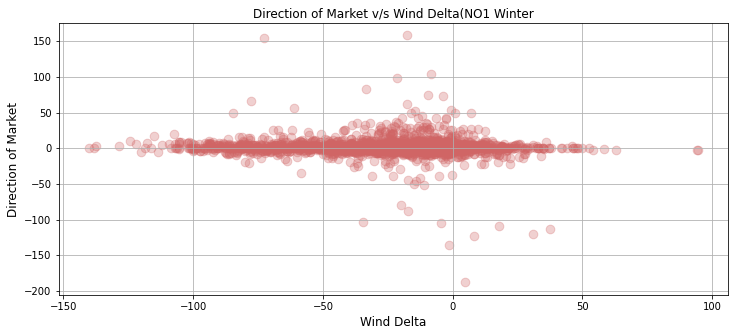

In [50]:
fig= plt.figure(figsize=[12,5])
plt.scatter(x=df_plot['Wind Delta__'],
            y=df_plot['Direction'],
            alpha=0.3,
            s=75,
            color=red);
plt.grid()
plt.xlabel("Wind Delta", fontsize=12),
plt.ylabel("Direction of Market", fontsize=12);
plt.title("Direction of Market v/s Wind Delta(NO1 Winter")
plt.autoscale();

In [51]:
df_plot['Wind Delta__'].quantile(0.9)

5.841000000000005